# Importing Required Packages


In [1]:
import pandas as pd
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

Matplotlib is building the font cache; this may take a moment.


# Get Data Set

In [5]:
data = pd.read_csv(r"C:\Users\ADHARSH BELAGAPU\Desktop\adharsh\Machine Learning\2 - Lending Club Case Study\loan.csv", error_bad_lines=False, index_col=False, dtype='unicode')

In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [7]:
data.shape

(39717, 111)

In [ ]:
# Number of rows= 39717
# Number of columns = 111

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [9]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [ ]:
# above describe() commands gives the idea of the data

# Data Cleaning
-  Identify and Analyse rows and columns to be deleted or cleaned or fixed
-  For significant variables(columns) impute missing values
-  Make standardise values
-  Fix invalid values
-  Extract required final data by filtering data

#### 1. Checklist for Fixing Rows
#### 2. Checklist for Fixing Columns
#### 3. Checklist for missing values
#### 4. Checklist for Standardise values
#### 5. Checklist for Fixing invalid values
#### 6. Checklist for Filtering Data

In [11]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)

In [12]:
# 54 columns have all NULL values
(missing_value_df['percent_missing'] == 100.00).sum()

54

In [13]:
# Returns the List of columns having the NULL values
missing_values_columns = missing_value_df[(missing_value_df['percent_missing'] == 100.00)].column_name.tolist()

In [17]:
# Dropping columns having all missing values
null_columns_dropped_data = data.drop(missing_values_columns, axis=1)

In [18]:
null_columns_dropped_data = null_columns_dropped_data.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d',
                                                           'mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [19]:
## Deleting column having all values as same. So not adding any importance in analysis
null_columns_dropped_data = null_columns_dropped_data.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [20]:
## Deleting string columns having most of as unique values
null_columns_dropped_data = null_columns_dropped_data.drop(['emp_title'], axis=1)

In [21]:
## Check percentage of missing data
((null_columns_dropped_data.isnull().sum() * 100 / len(null_columns_dropped_data)).sort_values(
    ascending=False)).head(10)

emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
total_pymnt            0.00
pub_rec                0.00
revol_bal              0.00
total_acc              0.00
dtype: float64

In [22]:
null_columns_dropped_data.shape

(39717, 40)

In [ ]:
# The data set came down to 40 columns from 111 columns after removal of Null Columns(54), Irrelevant columns, not valuable data columns
# Now we need to identify columns which are Categorical and Continuous for analysis

# Identifying Categorical Columns
##### Count of number of unique values in the column

In [23]:
null_columns_dropped_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,39717,39717,39717,39717,39717,39717,39717,39717,38642,39717,39717,39717,39717,39717,39717,39706,39717,39717,39717,39717,39717,39717,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,39715,39020
unique,885,1041,8205,2,371,15383,7,35,11,5,5318,3,55,3,14,19615,823,50,2868,11,526,9,40,5,21711,1089,82,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,106,3
top,10000,10000,5000,36 months,10.99%,311.11,B,B3,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,7,0,0,0%,16,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,May-16,0
freq,2833,2741,1309,29096,956,68,12020,2917,8879,18899,1505,16921,2260,32950,18641,2184,597,7099,183,35405,370,19300,4018,37601,994,977,1471,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,10308,37339


In [24]:
data = []
for row in null_columns_dropped_data.columns.tolist():
    data.append({'column': row, 'count': len(null_columns_dropped_data[row].unique())})

In [25]:
unique = pd.DataFrame(data).sort_values('count')

In [29]:
unique.head(20)

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
39,pub_rec_bankruptcies,4
23,pub_rec,5
9,home_ownership,5
6,grade,7
21,inq_last_6mths,9
19,delinq_2yrs,11
8,emp_length,12


# Creating derived columns

In [30]:
# null_columns_dropped_data[null_columns_dropped_data.isnull().sum(axis=1) >= 2]
null_columns_dropped_data['term_months'] = null_columns_dropped_data['term'].str.rstrip('months')
del null_columns_dropped_data['term']

In [31]:
null_columns_dropped_data['int_rate_percentage'] = null_columns_dropped_data['int_rate'].str.rstrip('%')
del null_columns_dropped_data['int_rate']

In [32]:
null_columns_dropped_data['emp_length_years'] = null_columns_dropped_data['emp_length'].str.rstrip('years ')
null_columns_dropped_data['emp_length_years'].replace({'10+': '10'}, inplace=True)
null_columns_dropped_data['emp_length_years'][null_columns_dropped_data['emp_length_years'] == '< 1'] = '0.5'
del null_columns_dropped_data['emp_length']

In [33]:
null_columns_dropped_data['revol_util_percentage'] = null_columns_dropped_data['revol_util'].str.rstrip('%')
del null_columns_dropped_data['revol_util']

In [42]:
null_columns_dropped_data['issue_d_month','issue_d_year'] = null_columns_dropped_data[
    'issue_d'].str.split('-')

null_columns_dropped_data['last_credit_pull_d_month','last_credit_pull_d_year'] = null_columns_dropped_data[
   'last_credit_pull_d'].str.split('-')

null_columns_dropped_data['last_pymnt_d_month','last_pymnt_d_year'] = null_columns_dropped_data[
  'last_pymnt_d'].str.split('-')

null_columns_dropped_data['earliest_cr_line_month','earliest_cr_line_year'] = null_columns_dropped_data[
    'earliest_cr_line'].str.split('-')

In [43]:
null_columns_dropped_data['issue_d_year'] = '20' + null_columns_dropped_data['issue_d_year']

# Updated column datatype

In [52]:
#note: while updating the columns to float, check whether the values are only numbers or not
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(float)

In [53]:
# Creating a profit and loss column
null_columns_dropped_data['PnL']=(
    null_columns_dropped_data['total_pymnt']-null_columns_dropped_data['funded_amnt']
)*100/null_columns_dropped_data['funded_amnt']

In [56]:
null_columns_dropped_data['loan_inc_ratio'] = null_columns_dropped_data.funded_amnt*100/null_columns_dropped_data.annual_inc

In [57]:
columns = ['total_acc', 'term_months', 'issue_d_year']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(int)

In [58]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].apply(lambda x: x.astype('category'))

In [59]:
null_columns_dropped_data['annual_inc_lakhs'] = null_columns_dropped_data['annual_inc'] / 1000

In [60]:
null_columns_dropped_data['annual_inc_lakhs'].describe()

count   39,717.00
mean        68.97
std         63.79
min          4.00
25%         40.40
50%         59.00
75%         82.30
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [61]:
null_columns_dropped_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,"(issue_d_month, issue_d_year)","(last_credit_pull_d_month, last_credit_pull_d_year)","(last_pymnt_d_month, last_pymnt_d_year)","(earliest_cr_line_month, earliest_cr_line_year)",PnL,loan_inc_ratio,annual_inc_lakhs
0,"5,000.00","5,000.00","4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,"13,648.00",9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0,0,0,Jan-15,171.62,May-16,0,36,10.65,10.00,83.70,Dec,202011,May,16,Jan,15,Jan,85,"[Dec, 11]","[May, 16]","[Jan, 15]","[Jan, 85]",17.26,20.83,24.00
1,"2,500.00","2,500.00","2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,"1,687.00",4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,60,15.27,0.50,9.40,Dec,202011,Sep,13,Apr,13,Apr,99,"[Dec, 11]","[Sep, 13]","[Apr, 13]","[Apr, 99]",-59.65,8.33,30.00
2,"2,400.00","2,400.00","2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,"2,956.00",10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0,0,0,Jun-14,649.91,May-16,0,36,15.96,10.00,98.50,Dec,202011,May,16,Jun,14,Nov,01,"[Dec, 11]","[May, 16]","[Jun, 14]","[Nov, 01]",25.24,19.59,12.25
3,"10,000.00","10,000.00","10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,"5,598.00",37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0,0,Jan-15,357.48,Apr-16,0,36,13.49,10.00,21,Dec,202011,Apr,16,Jan,15,Feb,96,"[Dec, 11]","[Apr, 16]","[Jan, 15]","[Feb, 96]",22.32,20.33,49.20
4,"3,000.00","3,000.00","3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,"27,783.00",38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0,0,0,May-16,67.79,May-16,0,60,12.69,1.00,53.90,Dec,202011,May,16,May,16,Jan,96,"[Dec, 11]","[May, 16]","[May, 16]","[Jan, 96]",17.11,3.75,80.00


# Count of Categorical and Numeric columns

In [65]:
numeric_data = null_columns_dropped_data.select_dtypes(include = [np.number])

categorical_data = null_columns_dropped_data.select_dtypes(exclude = [np.number, object])

string_data = null_columns_dropped_data.select_dtypes(include = [object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))


There are 20 numerical , 12 categorical and 23 string features in the training data


In [67]:
## Removing current loan status as it's not needed in the analysis
null_columns_dropped_data = null_columns_dropped_data[null_columns_dropped_data.loan_status !='Current']
#null_columns_dropped_data = null_columns_dropped_data.loc[:,null_columns_dropped_data.nunique()!=1]


In [74]:
## Final dataset for Exploratory Data Analytics
df = null_columns_dropped_data

In [75]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

# Univariate Analysis

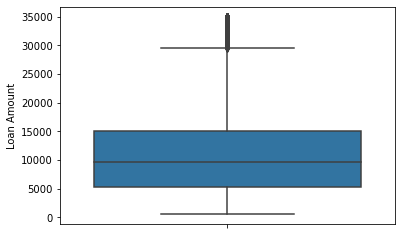

In [76]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [77]:
#Inference: The loan amount varies from 0 to 35,000 having mean of 10,000

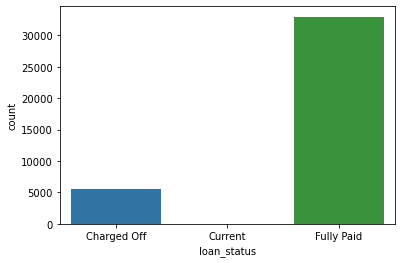

In [78]:
sns.countplot(x= null_columns_dropped_data["loan_status"])
plt.show()

In [79]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

In [80]:
# Inference:

# Most of the loans are Fully Paid.
# About 14% of loan are having status as defaulters.
# We have a class imbalance here.

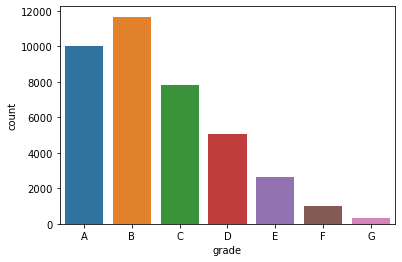

In [81]:
sns.countplot(x='grade', data=df)
plt.show()

#### Inference: Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

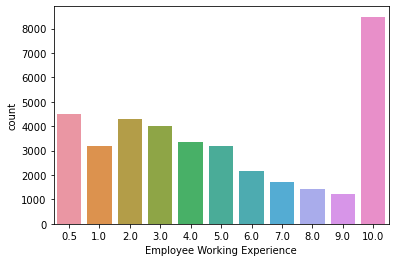

In [82]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

#### Inference: Majority of employees applying for the loan have more than 10 years of experience

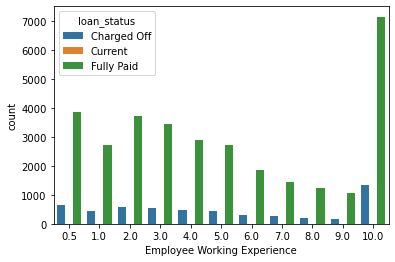

In [83]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

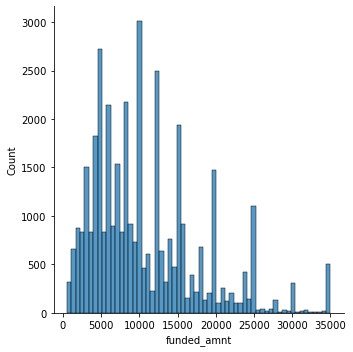

In [85]:
sns.displot(df['funded_amnt'])
plt.show()

#### Inference: Funded amount is left skewed. Most of the loan amount given is 5 lakhs

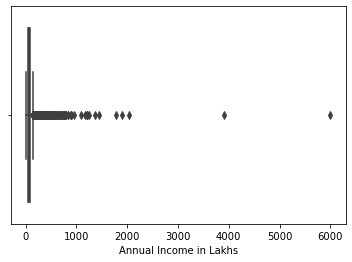

In [86]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

#### Inference: There are only two applicants having annual income of more than 30 lakhs. These are outliers

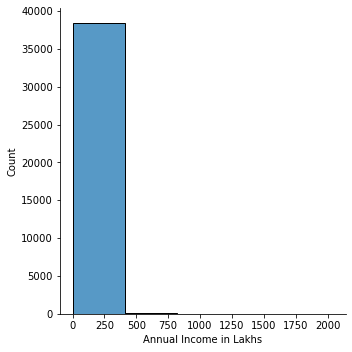

In [89]:
sns.displot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

#### Inference: Majority of loan applicants have income less than 5 lakhs

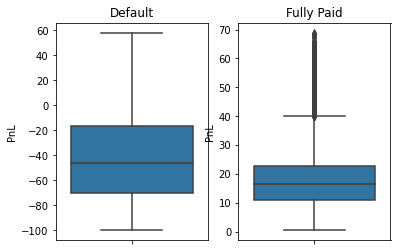

In [90]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

# Segmented Univariate Analysis

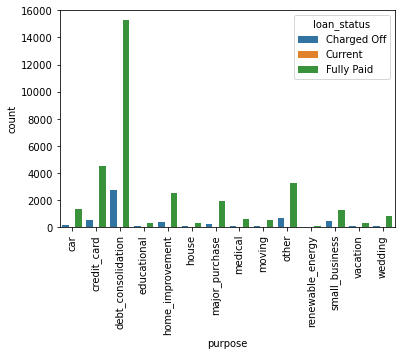

In [93]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

#### Inference: Majority of loan has been given for the debt consolidation purpose and has been fully paid.

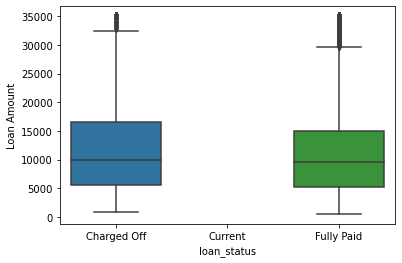

In [94]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

#### Inference: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

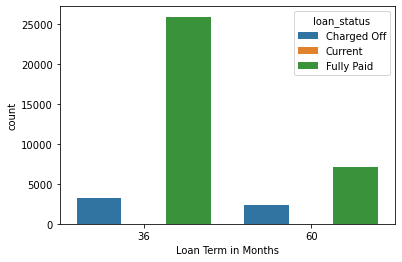

In [95]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

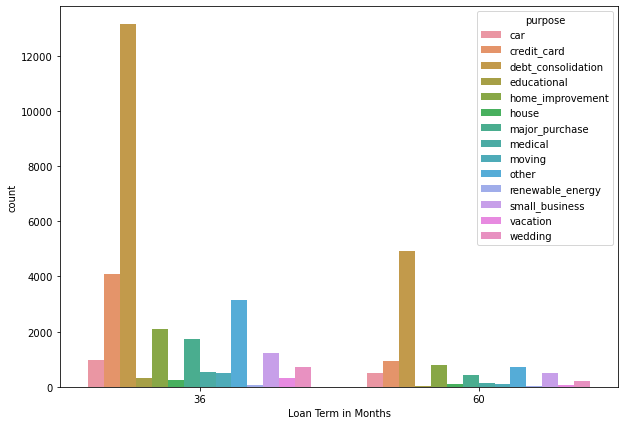

In [96]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

#### Inference: Tenure of 36 months have high chances to be defaulters

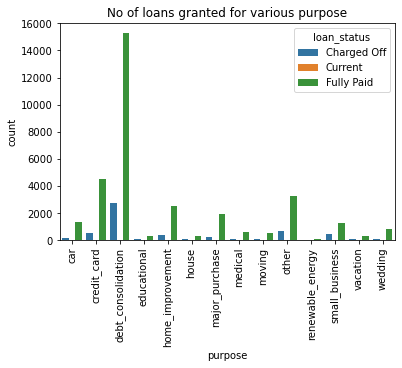

In [97]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

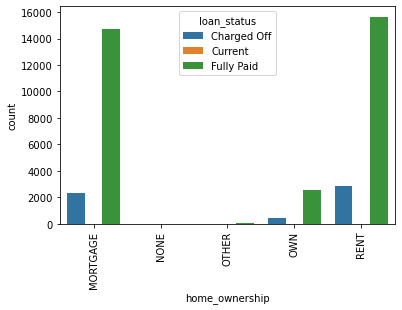

In [98]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

# Bivariate Plots

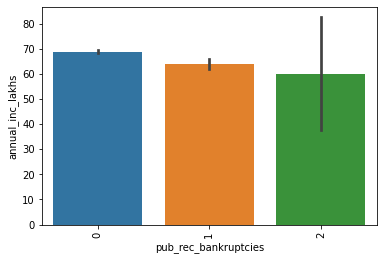

In [99]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

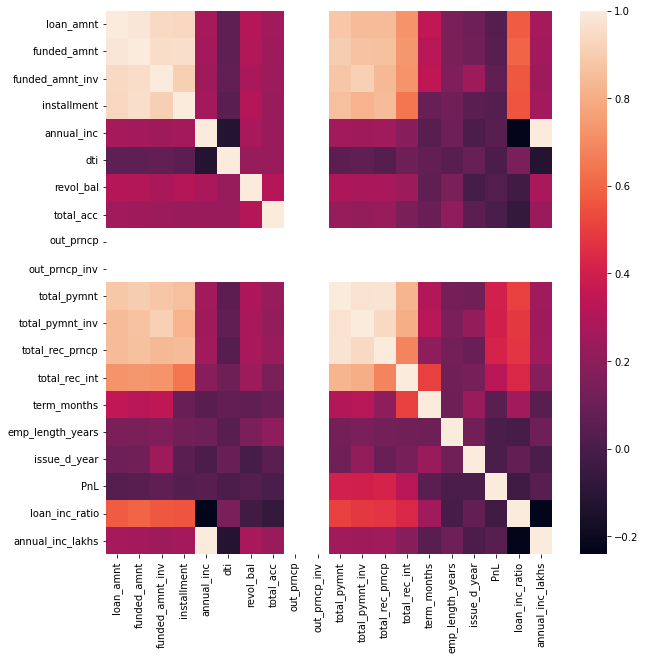

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

#### Inference: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

In [101]:
del numeric_data['out_prncp']
del numeric_data['out_prncp_inv']

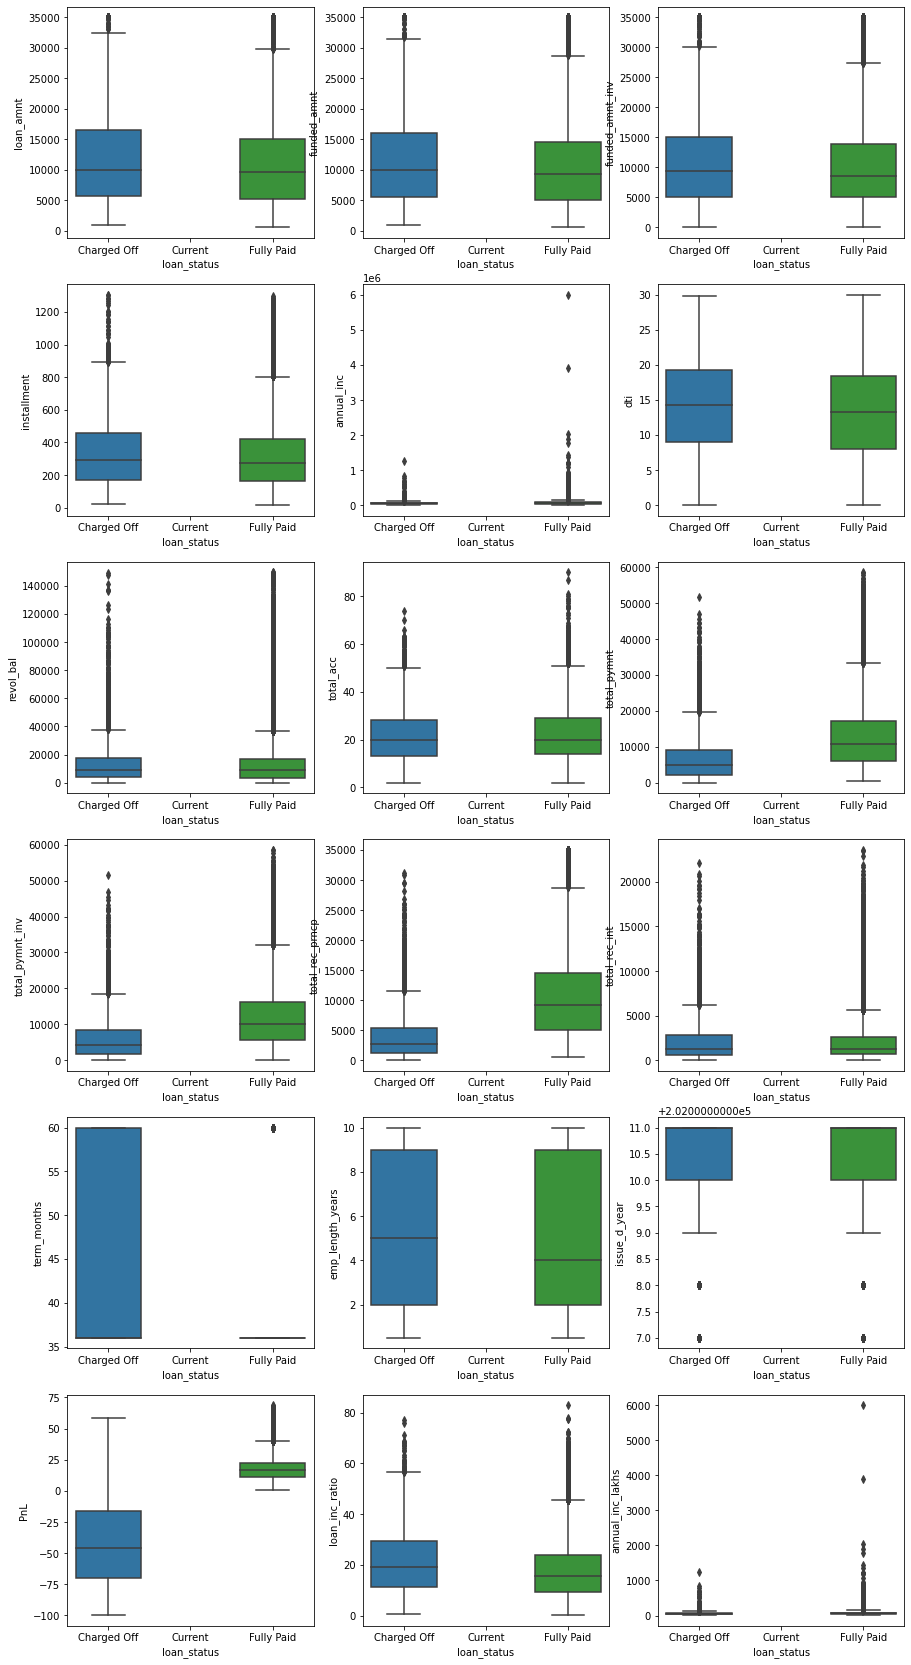

In [102]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df)

plt.show()

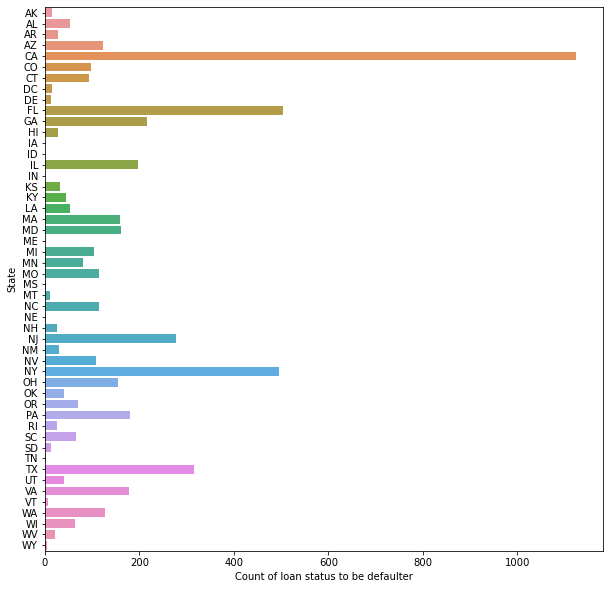

In [103]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

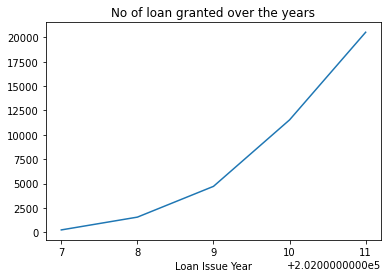

In [104]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

#### Inference: Loan Applicants have been increasing exponentially from year 2007 to 2011

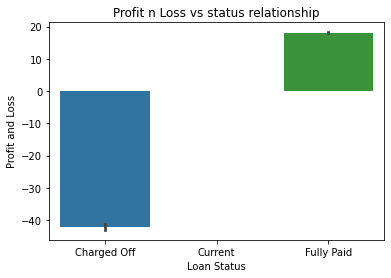

In [106]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PnL',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

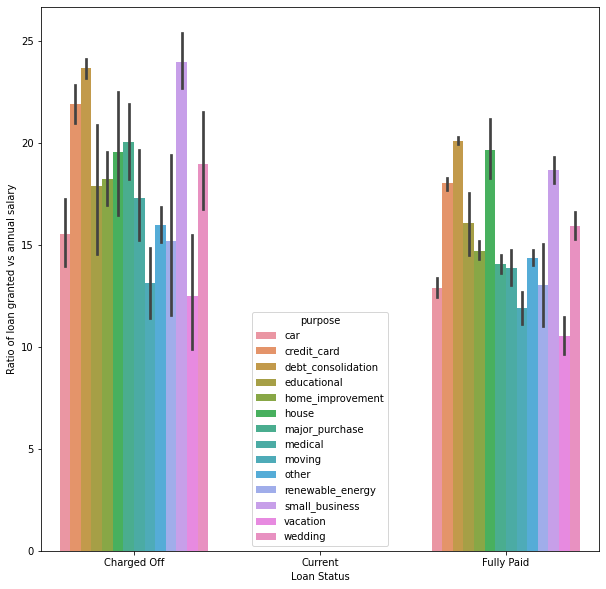

In [107]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [108]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

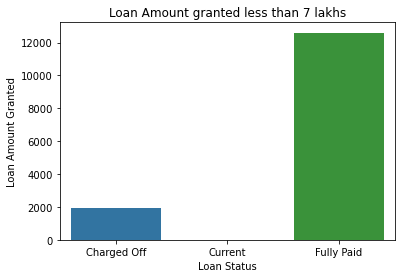

In [109]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [110]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

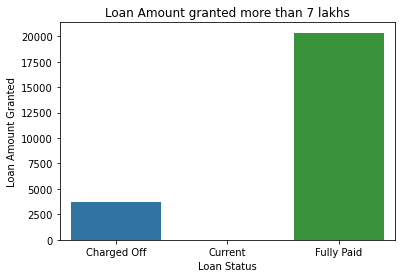

In [111]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()